# Tarea 1: Python

## Natural Lenguague Procesing 

   ## José Luis de León Carmona
   
ARCHIVOS DE LAS CONFERENCIAS EN: https://drive.google.com/drive/folders/1Q9e0Fqd6cApyAWyBhlaQ1pnpqji-fXMR?usp=sharing
                
### 1. Construcción de un Corpus

In [28]:
import requests
import os

def descargar_url(url, carpeta_destino, nombre_archivo):
    headers = {'User-Agent': 'Tu Agente de Usuario Personalizado'}  # Puedes cambiar esto según sea necesario

    try:
        # Hacer la solicitud GET con el encabezado
        response = requests.get(url, headers=headers)

        # Verificar si la solicitud fue exitosa (código de estado 200)
        if response.status_code == 200:
            # Crear la carpeta de destino si no existe
            if not os.path.exists(carpeta_destino):
                os.makedirs(carpeta_destino)

            # Construir la ruta completa del archivo
            ruta_completa = os.path.join(carpeta_destino, nombre_archivo)

            # Guardar el contenido en un archivo de texto
            with open(ruta_completa, 'w', encoding='utf-8') as archivo:
                archivo.write(response.text)

            print(f'Página descargada y guardada en {ruta_completa}')
        else:
            print(f'Error al hacer la solicitud. Código de estado: {response.status_code}')

    except Exception as e:
        print(f'Error: {e}')

url_page_i = 'https://presidente.gob.mx/secciones/version-estenografica/page/'
pages = 135
dir_pages = './paginas'

for i in range(pages):
    url = url_page_i + str(i + 1) + '/'
    file_i = str(i + 1) + '.txt'
    descargar_url(url, dir_pages, file_i)
    



Página descargada y guardada en ./paginas/1.txt
Página descargada y guardada en ./paginas/2.txt
Página descargada y guardada en ./paginas/3.txt
Página descargada y guardada en ./paginas/4.txt
Página descargada y guardada en ./paginas/5.txt
Página descargada y guardada en ./paginas/6.txt
Página descargada y guardada en ./paginas/7.txt
Página descargada y guardada en ./paginas/8.txt
Página descargada y guardada en ./paginas/9.txt
Página descargada y guardada en ./paginas/10.txt
Página descargada y guardada en ./paginas/11.txt
Página descargada y guardada en ./paginas/12.txt
Página descargada y guardada en ./paginas/13.txt
Página descargada y guardada en ./paginas/14.txt
Página descargada y guardada en ./paginas/15.txt
Página descargada y guardada en ./paginas/16.txt
Página descargada y guardada en ./paginas/17.txt
Página descargada y guardada en ./paginas/18.txt
Página descargada y guardada en ./paginas/19.txt
Página descargada y guardada en ./paginas/20.txt
Página descargada y guardada 

KeyboardInterrupt: 

In [ ]:
import os
import glob
from bs4 import BeautifulSoup

def extraer_urls_de_archivos(carpeta, patron_archivos='*.txt', palabra_clave='version-estenografica'):
    # Obtener la lista de archivos en la carpeta que coinciden con el patrón
    archivos = glob.glob(os.path.join(carpeta, patron_archivos))

    # Inicializar una lista para almacenar los URLs encontrados en todos los archivos
    urls_totales = []

    # Recorrer cada archivo y extraer los URLs
    for archivo in archivos:
        with open(archivo, 'r', encoding='utf-8') as f:
            contenido = f.read()
            urls_encontrados = extraer_urls_con_bs(contenido, palabra_clave)
            urls_totales.extend(urls_encontrados)

    return urls_totales

def extraer_urls_con_bs(html, palabra_clave):
    # Crear un objeto BeautifulSoup para analizar el HTML
    soup = BeautifulSoup(html, 'html.parser')

    # Encontrar todos los enlaces (<a>) en el HTML
    enlaces = soup.find_all('a')

    # Extraer los URLs de los enlaces que contienen la palabra clave
    urls = [enlace.get('href') for enlace in enlaces if enlace.get('href') and palabra_clave in enlace.get('href')]

    return urls

# Ejemplo de uso
carpeta_con_archivos = './paginas'  # Cambia esto con la ruta de tu carpeta
urls_totales = extraer_urls_de_archivos(carpeta_con_archivos)



In [ ]:
urls_conf = list(set(urls_totales))

def descargar_url(url, carpeta_destino, nombre_archivo):
    headers = {'User-Agent': 'Tu Agente de Usuario Personalizado'}  # Puedes cambiar esto según sea necesario

    try:
        # Hacer la solicitud GET con el encabezado
        response = requests.get(url, headers=headers)

        # Verificar si la solicitud fue exitosa (código de estado 200)
        if response.status_code == 200:
            # Crear la carpeta de destino si no existe
            if not os.path.exists(carpeta_destino):
                os.makedirs(carpeta_destino)

            # Construir la ruta completa del archivo
            ruta_completa = os.path.join(carpeta_destino, nombre_archivo)

            # Guardar el contenido en un archivo de texto
            with open(ruta_completa, 'w', encoding='utf-8') as archivo:
                archivo.write(response.text)

            print(f'Página descargada y guardada en {ruta_completa}')
        else:
            print(f'Error al hacer la solicitud. Código de estado: {response.status_code}')

    except Exception as e:
        print(f'Error: {e}')
        
dir_estenograficas = './estenograficas'

for u in urls_conf:
    # Usar solo la parte del path de la URL como nombre de archivo
    filename = u.replace('/', '_') + '.txt'
    descargar_url(u, dir_estenograficas, filename)


In [ ]:
for f_pagina in glob.glob("./estenograficas/*"):
    with open(f_pagina, "r", encoding="utf-8") as archivo_entrada:
        contenido_html = archivo_entrada.read()
        soup = BeautifulSoup(contenido_html, 'html.parser')

    nombre_archivo_salida = f_pagina.replace("./estenograficas/", "")
    ruta_archivo_salida = "./estenograficas_limpias/" + nombre_archivo_salida

    with open(ruta_archivo_salida, "w", encoding="utf-8") as archivo_salida:
        archivo_salida.write(soup.get_text())

    print(f'Contenido de {f_pagina} limpiado y guardado en {ruta_archivo_salida}')



In [ ]:
import re
from datetime import datetime

fechas_conferencia = []
count_raros = 0
count_terceros = 0
count_segundos = 0
count_4ts = 0

def normaliza(str_fecha):
    datetimeobject = datetime.strptime(str_fecha[:6] + "20" + str_fecha[6:], '%d.%m.%Y')
    newformat = datetimeobject.strftime('%Y-%m-%d')
    
    return newformat

for f_pagina in glob.glob("./estenograficas_limpias/*"):
    texto = open(f_pagina, "r", encoding = "utf-8").read()
    fechas_en_archivo = re.findall('[0-9][0-9]\.[0-9][0-9]\.[0-9][0-9]', texto)
    
    
    
    if len(fechas_en_archivo) == 4:
        if not os.path.isfile("./estenograficas_limpias_por_fecha/" + normaliza(fechas_en_archivo[0])):
            f = open("./estenograficas_limpias_por_fecha/" + normaliza(fechas_en_archivo[0]), "w", encoding = "utf-8").write(texto)
            fechas_conferencia += [normaliza(fechas_en_archivo[0])]
        elif not os.path.isfile("./estenograficas_limpias_por_fecha/" + normaliza(fechas_en_archivo[0]) + "_2da"):
            open("./estenograficas_limpias_por_fecha/" + normaliza(fechas_en_archivo[0]) + "_2da", "w", encoding = "utf-8").write(texto)
            fechas_conferencia += [normaliza(fechas_en_archivo[0])]
            count_segundos += 1
        elif not os.path.isfile("./estenograficas_limpias_por_fecha/" + normaliza(fechas_en_archivo[0]) + "_3ra"):
            open("./estenograficas_limpias_por_fecha/" + normaliza(fechas_en_archivo[0]) + "_3ra", "w", encoding = "utf-8").write(texto)
            fechas_conferencia += [normaliza(fechas_en_archivo[0])]
            count_terceros += 1
        elif not os.path.isfile("./estenograficas_limpias_por_fecha/" + normaliza(fechas_en_archivo[0]) + "_4ta"):
            open("./estenograficas_limpias_por_fecha/" + normaliza(fechas_en_archivo[0]) + "_4ta", "w", encoding = "utf-8").write(texto)
            fechas_conferencia += [normaliza(fechas_en_archivo[0])]
            count_4ts += 1
    else:
        print("RARO: ", f_pagina)
        print(fechas_en_archivo)
        count_raros += 1
        
    
print(count_raros)
print(count_segundos)
print(count_terceros)
print(count_4ts)

In [ ]:
c = 0

for f_pagina in glob.glob("./estenograficas_limpias/*"):
    texto = open(f_pagina, "r", encoding = "utf-8").read()
    fechas_en_archivo = re.findall('[0-9][0-9]\.[0-9][0-9]\.[0-9][0-9]', texto)
    if len(fechas_en_archivo) != 0 and len(fechas_en_archivo) != 4:
        print(fechas_en_archivo)
        print(len(fechas_en_archivo))
        print(f_pagina)
        c += 1
        
print(c)


"""
Nos muestra como raros los propios links de las paginas
"""

In [ ]:
r = 0

for f_pagina in glob.glob("./estenograficas_limpias/*"):
    texto = open(f_pagina, "r", encoding = "utf-8").read()
    fechas_en_archivo = re.findall('[0-9][0-9]\.[0-9][0-9]\.[0-9][0-9]', texto)
    if len(fechas_en_archivo) == 0:
        print(fechas_en_archivo)
        print(len(fechas_en_archivo))
        print(f_pagina)
        r += 1
        
print(r)

"""
Solo tenemos 5 raros que son los que meteremos a mano en el directorio de "estenograficas_limpias_por_fecha"

Además en el direcctorio tenemos 5 archivos más que fuero tomados por el codigo pero contienen una fechas incorrecta
antes del inicio del sexenio del presidente
"""

# Punto 2.1

Cargue todas las conferencias en un string y aplique la función split para generar tokens
fácilmente.

In [ ]:
import glob

contenidos_archivos = []

for f_pagina in glob.glob("./estenograficas_limpias_por_fecha/*"):
    texto = open(f_pagina, "r", encoding = "utf-8").read()
    contenidos_archivos.append(texto)
    
string_completa = ''.join(contenidos_archivos)

tokens = string_completa.split()

tokens


In [ ]:
# 2.2 Contar la cantidad de palabras en todas las conferencias.

palabras_totales = len(tokens)
print("Cantidad de todas las palabras: ", palabras_totales)

#2.3 Extraer el vocabulario y mostrar su longitud de todo el corpus.

vocabulario = set(tokens)

print("Longuitud del corpus: ", len(vocabulario) )

# 2.4 Mida la riqueza del vocabulario de alguna forma en todos los documentos.

riqueza_vocabulario = palabras_totales / len(vocabulario)

print("Riqueza del vocabulario: ", riqueza_vocabulario)

In [ ]:
# 2.5 Haga lo mismo que los 4 puntos anteriores pero con todo el texto en min ́usculas. Vea
#     las diferencias y comente brevemente (sino comentas habr ́a penalizaci ́on).

# Convierte todo el texto a minúsculas
minusculas = string_completa.lower()

# Dividir el texto en palabras (tokens)
tokens_minus = minusculas.split()

# Crear un conjunto para obtener palabras únicas (vocabulario)
vocabulario_mins = set(tokens_minus)

# Mostrar la longitud del vocabulario
longitud_vocabulario_mins = len(vocabulario_mins)

# Calcular el número total de palabras y el número de palabras únicas
total_palabras_mins = len(tokens_minus)
palabras_unicas_mins = len(set(tokens_minus))

# Calcular la riqueza léxica
riqueza_lexica_mins =  total_palabras_mins / palabras_unicas_mins

# Imprimir la longitud del vocabulario
print(f"Cantidad de palabras: {total_palabras_mins}")
print(f"Longitud del vocabulario: {longitud_vocabulario_mins}")
      
# Imprimir la riqueza léxica
print(f"Riqueza léxica: {riqueza_lexica_mins}")

## Comentario 2.5 :

Lo que pasa al hacer los mismos calculos con solo minusculas evidentemente la cantidad de palabras seria la misma
pero a la hora de calcular el vocabulario que son las palabras unicas este numero se reduce ya que no hay diferencias entre minusculas y mayusculas. Y al tener una longuitud menor de palabras y la misma cantidad de palabras lo que hace que aumente la riqueza lexica del vocobulario que estamos analizando

### 2.6

Haga lo mismo que los puntos 1, 2 y 3 usando el tokenizador RegExp de NLTK, con
una expresi ́on regular que trate de sacar solo tokens que pueden contener solo letras
may ́usculas y min ́usculas. Despu ́es cargue los tokens en un objeto Text de NLTK en
lugar de una lista de Python.

In [ ]:
from nltk import Text
from nltk.tokenize import RegexpTokenizer

# Definir el tokenizador RegExp para extraer solo tokens con letras mayúsculas y minúsculas
tokenizer = RegexpTokenizer(r'\b[A-Za-z]+\b')

# Tokenizar usando el tokenizador RegExp
tokens_nltk = tokenizer.tokenize(string_completa)

print("Cantidad de palabras: ", len(tokens_nltk))

vocabulario_nltk = set(tokens_nltk)

riqueza_nltk = len(tokens_nltk) / len(vocabulario_nltk)

print("Longuitud del vocabulario: ", len(vocabulario_nltk))
print("Riqueza token nltk: ", riqueza_nltk)

# Crear un objeto Text de NLTK
texto_nltk = Text(tokens)

type(texto_nltk)

# 2.7 

Haga todo el texto min ́usculas. Haga los mismo que los puntos 1, 2, y 3 usando el
tokenizador TweetTokenizer ; COMENTE BREVEMENTE DIFERENCIAS. Haga el
resto de esta tarea asumiendo haber hecho este punto.

In [ ]:
from nltk.tokenize import TweetTokenizer

tweet_tokenizer = TweetTokenizer()

# Tokenizar usando el TweetTokenizer
tokens_tweet = tweet_tokenizer.tokenize(minusculas) #Usando el texto en minusculas

print("Cantidad de palabras: ", len(tokens_tweet))

vocabulario_tweet = set(tokens_tweet)

riqueza_tweet = len(tokens_tweet) / len(vocabulario_tweet)

print("Longuitud del vocabulario: ", len(vocabulario_tweet))
print("Riqueza token tweet: ", riqueza_tweet)

texto_nlkt = Text(tokens_tweet)

# Diferencias

En este caso, la principal diferencia entre el RegExp y Tweet es que el primero solo tokeniza los elementos que contienen letras ya sea mayusculas y minusculas y el segundo puede interpretar más elementos pensando en redes sociales como contenido de hashtags o caracteres especiales como mayusculas. 

# 3.1

Use la funci ́on concordance para ver el contexto de 5 palabras que usted elija.

In [29]:
texto_nltk.concordance('Jerez')

Displaying 25 of 32 matches:
larde: Me da gusto estar de nuevo en Jerez para participar en la inauguración d
ión en los municipios de Villanueva, Jerez y Tabasco en Zacatecas. Fue detenido
de armas de fuego en el municipio de Jerez durante los días 8, 9 y 10 de julio,
 de Zacatecas, Guadalupe, Fresnillo, Jerez y Pinos, que coinciden también donde
López Velarde, Jerez, inauguramos en Jerez una instalación, un cuartel para la 
me tocó inaugurar una instalación en Jerez y tenemos otras, pero como en Zacate
desprendido de dos bandidos: Eliezer Jerez Rosales, esposo de Valeria Santiago,
os con cultura. Acabamos de estar en Jerez para conmemorar… JESÚS RAMÍREZ CUEVA
uen escritor. Decía que estuvimos en Jerez recordando a Ramón López Velarde. En
r instrucciones hoy mismo, porque en Jerez tenemos una reunión precisamente de 
én la ciudad colonial de Zacatecas y Jerez desde luego, bellos templos. Y miren
ramas Integrales de Bienestar, desde Jerez de García Salinas, Zacatecas – Presi
ramas Integ

In [30]:
texto_nltk.concordance('Zacatecas')

Displaying 25 of 486 matches:
a distribuidora de Combustibles de Zacatecas S.A. en Zacatecas, Zacatecas. No c
lá por Durango y Nayarit, Jalisco, Zacatecas ya no hablaba yo del elefante reum
alisco, en el Estado de México, en Zacatecas y en Guerrero. Un ejemplo, Interga
 es: Durango, Jalisco, atravesamos Zacatecas y vamos a cruzar la sierra para ir
ra hospitales de IMSS-Bienestar de Zacatecas y un incremento del 20 por ciento 
unciones; se está reportando desde Zacatecas un 98 por ciento de recetas surtid
tar de nuevo con ustedes. Volver a Zacatecas a encontrarnos para informales y s
 vamos a arrancar de raíz. Vengo a Zacatecas a decirles que vamos a cumplir tod
grama significa una inversión para Zacatecas de mil 877 pesos, nada más los adu
 y niños con discapacidad. Aquí en Zacatecas van a recibir este apoyo casi cinc
a, quiero también decirles, porque Zacatecas es de los estados que más se van a
 mismo. Ahora, para los pueblos de Zacatecas calculamos que se van a obtener po
créditos s

In [31]:
texto_nltk.concordance('beisbol')

Displaying 3 of 3 matches:
formación, está impulsando mucho el beisbol desde Monterrey. Por ejemplo, han c
. Esto es importantísimo, porque el beisbol se estaba quedando rezagado.Con tod
la sección de deportes.Entonces, el beisbol nunca aparecía, ahí al final y eso 


In [32]:
texto_nltk.concordance('esland')

Displaying 1 of 1 matches:
cerca de ser nominado a los Premios Esland 2024. Estos premios… PRESIDENTE AND


In [33]:
texto_nltk.concordance('Arozarena')

Displaying 12 of 12 matches:
rentado a Arozarena, él pichando y Arozarena en el equipo que juega, que… INTER
, en lo único que estaba mejor que Arozarena era en el brazo, porque Roberto Cl
lotero, un humanista. Pero, bueno, Arozarena es muy bueno, mucho, mucho muy bue
ir aquí para el conjunto mexicano. Arozarena en primera instancia y después el 
nte. El pasado 13 de febrero Randy Arozarena solicita la nacionalidad mexicana,
der Relaciones Exteriores. Y lo de Arozarena ya lo había escuchado, que él quie
rena, porque lo enfrentó. Creo que Arozarena estaba con Tampa, si ¿verdad? INTE
 que si te manda… Estuve con Randy Arozarena hace como dos días. No lo quise su
 es tremendo pícher, le dije: Oye, Arozarena te macaneó, porque se enfrentaron 
e tiraran lo bateaba. Entonces, ya Arozarena está en el equipo de México. Enton
uy bien, muy bien. Nuestro paisano Arozarena es un fenómeno, batea, fildea, cor
, el año pasado estaba tremendo el Arozarena y le pegó jonrón a Julio, y estába


# 3.2 

Elija una palabra que le parezca interesante y muestre palabras con uso similar. Muestre
tambi ́en los contextos comunes. COMENTE al respecto.

In [34]:
texto_nltk.similar('violencia')

y que la pero en de el es por porque no o los ya lo como también si a
un


In [35]:
texto_nltk.common_contexts(['violencia', 'Zacatecas'])

de_en la_y de_que de_y de_se de_por la_es de_es de_no de_a de_para
de_o con_y por_y de_con de_fue de_el de_porque de_lo de_tiene


# Comentario

Por lo que se mustra parece haber muchos contextos en los que estás palabras fueron usados en contextos simaleres observando las palabras tiene sentido ya que usadas juntas son como para informar acerca de la violencia sucedida en Zacatecas.

# 3.3

Haciendo uso de alguna librer ́ıa time de Python: organice todos los archivos de las
conferencias desde la m ́as antigua hasta la m ́as nueva (echando mano del nombre del
archivo y fechas), y c ́arguelos en un objeto Text para generar un dispersion plot de las
siguientes palabras: prian, corrupci ́on, mafia, narco, gasolina, pipas, conacyt, conahcyt,
ciencia, turismo, pandemia, coronavirus, covid, delta, omicron, vacuna, vacunacion y
otras cinco palabras de su elecci ́on.

In [36]:
import os
import re

# Ruta del directorio que contiene los archivos
ruta_directorio = './estenograficas_limpias_por_fecha'

# Obtén la lista de nombres de archivo en el directorio
archivos_en_carpeta_por_fecha = os.listdir(ruta_directorio)

# Ordena la lista de tuplas por fechas
archivos_en_carpeta_por_fecha.sort()

try:
    # Elimina el primer archivo de la lista
    del archivos_en_carpeta_por_fecha[0]

    # Combina el contenido de los archivos en una sola cadena respetando el orden de las fechas
    texto_completo = ''
    for nombre_archivo in archivos_en_carpeta_por_fecha:
        with open(os.path.join(ruta_directorio, nombre_archivo), 'r', encoding='utf-8') as archivo:
            contenido_archivo = archivo.read()
            texto_completo += contenido_archivo

except Exception as e:
    print(f"Error: {e}")
    
len(texto_completo)


97707271

In [37]:
# Tokenizar usando el tokenizador RegExp
tokens_nltk_fecha = tokenizer.tokenize(texto_completo)


# Crear un objeto Text de NLTK
texto_nltk_fecha = Text(tokens_nltk_fecha)


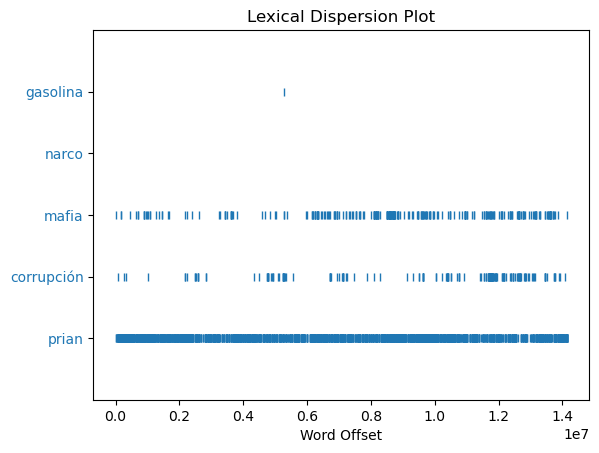

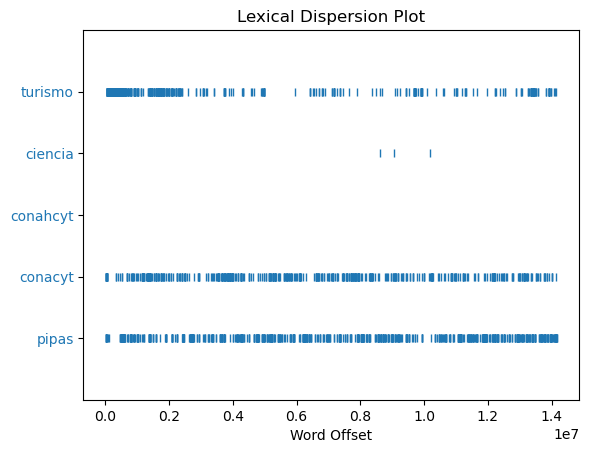

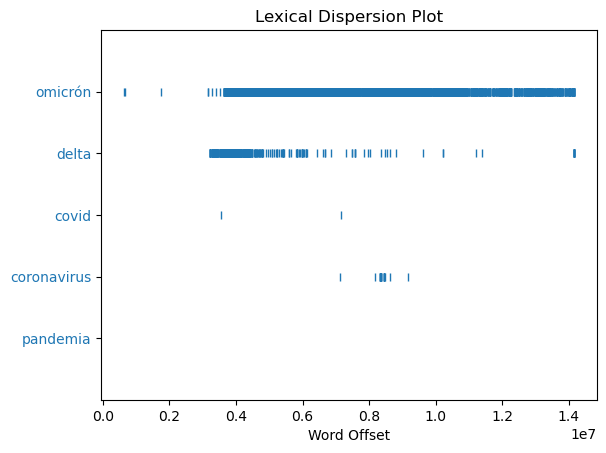

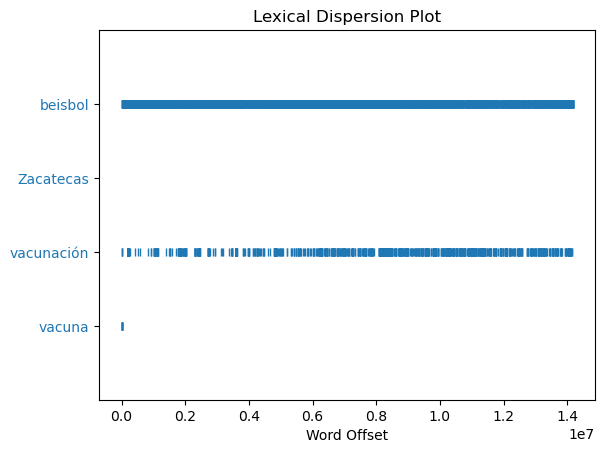

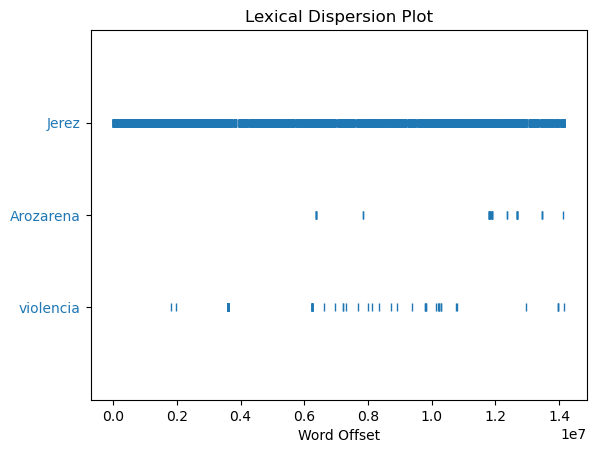

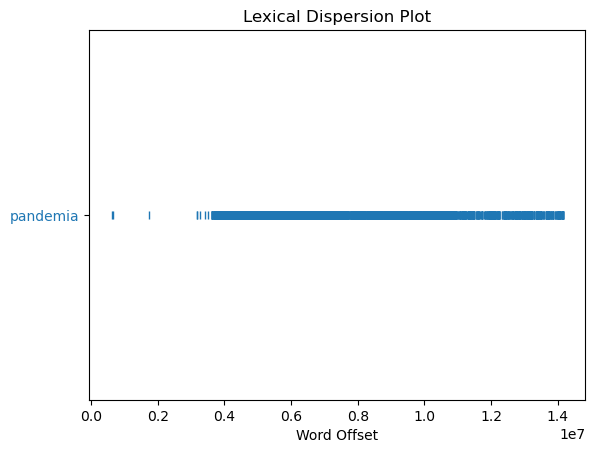

In [38]:
import matplotlib.pyplot as plt

# Lista de palabras para el dispersion plot
palabras_dispersion = ['prian', 'corrupción', 'mafia', 'narco', 'gasolina', 'pipas',
                       'conacyt', 'conahcyt', 'ciencia', 'turismo', 'pandemia', 'coronavirus',
                       'covid', 'delta', 'omicrón', 'vacuna', 'vacunación', 
                       'Zacatecas', 'beisbol', 'violencia', 'Arozarena', 'Jerez']

palabras1 = ['prian', 'corrupción', 'mafia', 'narco', 'gasolina']
palabras2 = ['pipas', 'conacyt', 'conahcyt', 'ciencia', 'turismo']
palabras3 = ['pandemia', 'coronavirus', 'covid', 'delta', 'omicrón']
palabras4 = ['vacuna', 'vacunación', 'Zacatecas', 'beisbol']
palabras5 = ['violencia', 'Arozarena', 'Jerez']


# Generar el dispersion plot para las palabras seleccionadas

texto_nltk_fecha.dispersion_plot(palabras1)
texto_nltk_fecha.dispersion_plot(palabras2)
texto_nltk_fecha.dispersion_plot(palabras3)
texto_nltk_fecha.dispersion_plot(palabras4)
texto_nltk_fecha.dispersion_plot(palabras5)

texto_nltk_fecha.dispersion_plot(['pandemia'])



# 3.4

Muestre 50 colocaciones de todo el corpus.

In [39]:
from nltk import FreqDist
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures

# Obtener las colocaciones utilizando BigramCollocationFinder
finder = BigramCollocationFinder.from_words(texto_nltk)
collocations = finder.nbest(BigramAssocMeasures.likelihood_ratio, 50)

# Mostrar las 50 colocaciones
print("50 Colocaciones:")
for collocation in collocations:
    print(" ".join(collocation))



50 Colocaciones:
ANDRÉS MANUEL
MANUEL LÓPEZ
PRESIDENTE ANDRÉS
LÓPEZ OBRADOR:
va a
vamos a
que se
de la
lo que
en el
Andrés Manuel
Manuel López
López Obrador
van a
todos los
por ciento
de de
prensa matutina
Estados Unidos
Versión estenográfica
OBRADOR: Sí,
nada más
o sea,
millones de
voy a
que no
no se
el caso
la Secretaría
de prensa
presidente Andrés
señor presidente.
de los
a los
es un
Tren Maya
en la
Secretaría de
de México
Estados Unidos,
que de
Jóvenes Construyendo
a cabo
a la
la gente
todas las
mil millones
Por eso
a de
no hay


# 3.5

Muestre un histograma de longitud en caracteres de las palabras. Muestre en el his-
tograma el top 5 de longitudes m ́as largas.

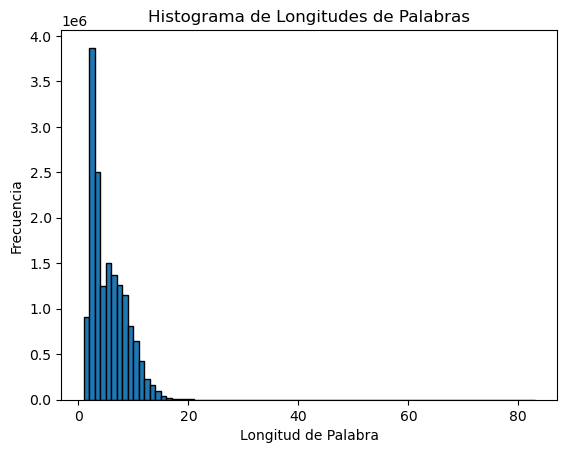

[82, 69, 68, 58, 49]


In [40]:
import matplotlib.pyplot as plt


# Obtener las longitudes de las palabras
longitudes_palabras = [len(word) for word in texto_nltk]

# Crear un histograma de las longitudes de las palabras
plt.hist(longitudes_palabras, bins=range(1, max(longitudes_palabras) + 2), edgecolor='black')
plt.title('Histograma de Longitudes de Palabras')
plt.xlabel('Longitud de Palabra')
plt.ylabel('Frecuencia')

plt.show()

top5_longitudes = sorted(set(longitudes_palabras), reverse=True)[:5]

print(top5_longitudes)

# 3.6 

Muestre 50 palabras con longitud mayor a 8 caracteres y frecuencia mayor a 5 en todo
el texto usando comprenhension list de python.

In [41]:
from nltk import FreqDist

# Crear un objeto FreqDist para contar la frecuencia de cada palabra
frecuencia_palabras = FreqDist(texto_nltk)

# Obtener las palabras con longitud mayor a 8 caracteres y frecuencia mayor a 5
palabras_seleccionadas = [palabra for palabra, frecuencia in frecuencia_palabras.items() if len(palabra) > 8 and frecuencia > 5][:50]

# Mostrar las 50 palabras seleccionadas
print("50 palabras con longitud mayor a 8 caracteres y frecuencia mayor a 5:")
print(palabras_seleccionadas)


50 palabras con longitud mayor a 8 caracteres y frecuencia mayor a 5:
['estenográfica', 'conferencia', 'presidente', 'California', 'Presidente', 'foreach()', '/var/www/html/wordpress/wp-content/themes/diplomat/header-socials.php', 'Boletines', 'Transcripciones', 'Documentos', 'Fotogalería', 'Fotogalerías.', 'Reuniones', 'estatales', 'Bienestar', 'Presidencia', 'Biografía', 'Estenográfica', 'precursor', 'Revolución', 'PRESIDENTE', 'terminamos', 'seguridad', 'consistir', 'gobernador', 'compañero,', 'gobernante,', 'principios,', 'convicciones', 'honestidad.', 'olvidemos,', 'principal', 'corrupción,', 'desigualdad', 'económica,', 'violencia;', 'pandemia,', 'autoridades', 'gobierno,', 'imaginación,', 'honestidad,', 'presupuesto', 'naturales,', 'entreguen', 'particulares,', 'nacionales', 'extranjeros,', 'almirante', 'secretario', 'situación']


# 3.7

Ver https://www.nltk.org/book/ch02.html en la secci ́on 1.5. Proponga una gr ́afica
usando ConditionalFreqDist como la de la Secci ́on 1.5 para estos datos. Usted elige las
palabras.

[nltk_data] Downloading package inaugural to
[nltk_data]     /Users/joseluisdeleoncarmona/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


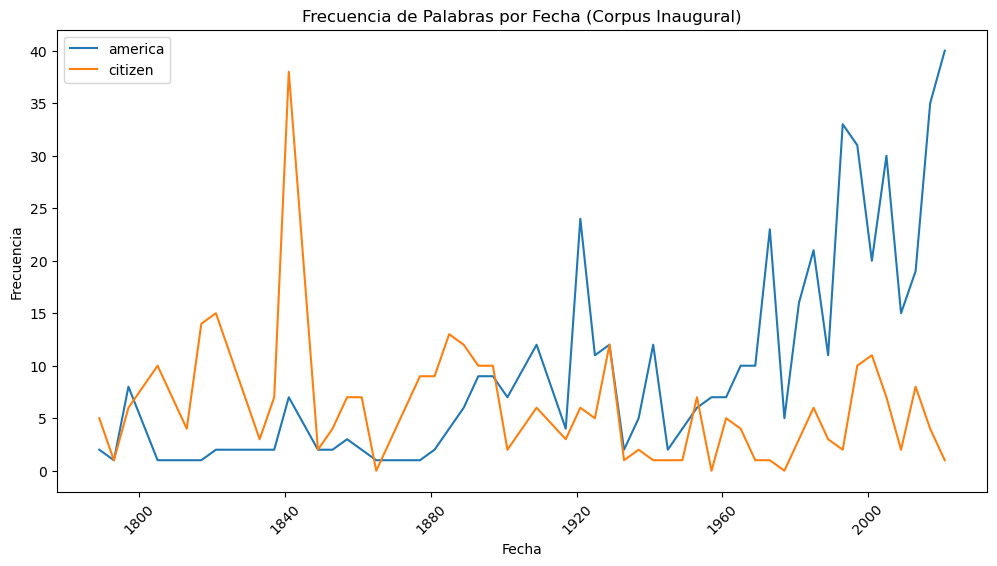

In [56]:
import nltk
from nltk.corpus import inaugural
from nltk.probability import ConditionalFreqDist
import matplotlib.pyplot as plt
from datetime import datetime

# Descargar recursos necesarios de NLTK
nltk.download('inaugural')

# Crear ConditionalFreqDist
cfd = ConditionalFreqDist(
    (target, datetime.strptime(fileid[:4], '%Y').date())
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['america', 'citizen']
    if w.lower().startswith(target)
)

# Palabras que te interesan
palabras_interes = ['america', 'citizen']

# Obtener fechas ordenadas
fechas_ordenadas = sorted(cfd[palabras_interes[0]].keys())

# Crear gráfico
plt.figure(figsize=(12, 6))
for palabra in palabras_interes:
    plt.plot(fechas_ordenadas, [cfd[palabra][fecha] for fecha in fechas_ordenadas], label=palabra)

plt.title('Frecuencia de Palabras por Fecha (Corpus Inaugural)')
plt.xlabel('Fecha')
plt.ylabel('Frecuencia')
plt.legend()
plt.xticks(rotation=45)
plt.show()




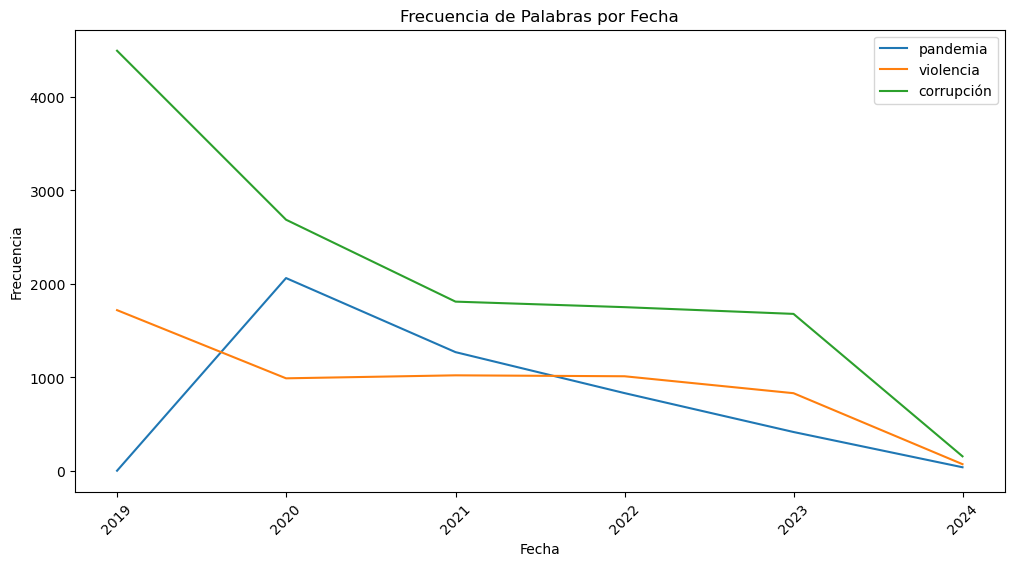

In [61]:
import os
import nltk
from nltk.probability import ConditionalFreqDist
import matplotlib.pyplot as plt
from datetime import datetime

# Ruta del directorio que contiene los archivos
ruta_directorio = './estenograficas_limpias_por_fecha'

# Obtén la lista de nombres de archivo en el directorio
archivos_en_carpeta_por_fecha = os.listdir(ruta_directorio)

# Ordena la lista de tuplas por fechas
archivos_en_carpeta_por_fecha.sort()

# Crear ConditionalFreqDist
cfd = ConditionalFreqDist(
    (target, datetime.strptime(nombre_archivo[:4], '%Y').date())
    for nombre_archivo in archivos_en_carpeta_por_fecha
    for w in nltk.word_tokenize(open(os.path.join(ruta_directorio, nombre_archivo), 'r', encoding='utf-8').read().lower())
    for target in ['pandemia', 'violencia', 'corrupción']  # Agrega las palabras que te interesan
    if w.startswith(target)
)

# Palabras que te interesan
palabras_interes = ['pandemia', 'violencia', 'corrupción']

# Obtener fechas ordenadas
fechas_ordenadas = sorted(cfd[palabras_interes[0]].keys())

# Crear gráfico
plt.figure(figsize=(12, 6))
for palabra in palabras_interes:
    plt.plot(fechas_ordenadas, [cfd[palabra][fecha] for fecha in fechas_ordenadas], label=palabra)

plt.title('Frecuencia de Palabras por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Frecuencia')
plt.legend()
plt.xticks(rotation=45)
plt.show()



# 3.8 

Use la lista de stopwords de nltk y obtenga la cantidad de palabras en los datos con y
sin stopword. Comente brevemente las diferencias.

In [44]:
from nltk.corpus import stopwords

stopwords_lista = stopwords.words('spanish')

print('Palabras con stopwords: ', len(texto_nltk))

texto_sin_stopwords = []

for palabra in texto_nltk:
    if palabra not in stopwords_lista:
        texto_sin_stopwords.append(palabra)

print('Palabras sin stopwords: ', len(texto_sin_stopwords))


Palabras con stopwords:  16268595
Palabras sin stopwords:  8749452


## Comentario:


# 3.9

Muestre las 300 palabras m ́as frecuentes en las conferencias, sin tomar en cuenta stop-
words. Mu ́estrelas de la m ́as frecuente a la menos frecuente.

In [45]:
text_nltk_sin_stopwords = Text(texto_sin_stopwords)

# Calcular la frecuencia de cada palabra
frecuencia_palabras = FreqDist(text_nltk_sin_stopwords)

# Obtener las 300 palabras más frecuentes
palabras_mas_frecuentes = frecuencia_palabras.most_common(300)

# Mostrar las palabras más frecuentes
for palabra, frecuencia in palabras_mas_frecuentes:
    print(f"{palabra}: {frecuencia}")

Y: 61079
va: 49249
mil: 45559
LÓPEZ: 44369
MANUEL: 44347
ANDRÉS: 44171
PRESIDENTE: 44005
OBRADOR:: 43847
si: 43471
vamos: 42419
Entonces,: 33686
En: 26253
México: 25797
aquí: 23967
dos: 22037
El: 21743
gobierno: 21674
van: 21393
presidente: 21225
millones: 20405
ser: 19139
ahora: 18751
ver: 18629
La: 18405
caso: 17954
hacer: 17180
pues: 17098
ahí: 16669
Pero: 15949
No: 15945
Es: 15439
tener: 15126
pesos: 15081
México,: 14778
tres: 14403
señor: 14220
gente: 14202
manera: 13938
puede: 13706
cómo: 13100
Por: 13039
presidente.: 13031
hace: 12988
así: 12940
Nacional: 12804
Estados: 12706
presidente,: 12620
parte: 12473
INTERLOCUTOR:: 12418
prensa: 12322
usted: 12244
Ya: 12199
pueblo: 12188
todas: 12063
voy: 11693
sólo: 11678
Se: 11614
INTERLOCUTORA:: 11464
ciento: 11330
año: 11269
día: 11265
Secretaría: 11094
PREGUNTA:: 10962
Sí,: 10681
Bueno,: 10507
importante: 10380
mismo: 10294
López: 10223
años: 10036
Versión: 10022
sea,: 9934
tema: 9933
programa: 9736
personas: 9709
A: 9625
no,: 9415
M

# 4.1

Mencione dos librer ́ıas en Python adem ́as de NLTK para NLP. Ponga una desventaja
y ventaja de cada una.

Además de NLTK, hay varias otras bibliotecas en Python utilizadas para el procesamiento del lenguaje natural (NLP). A continuación, menciono dos de ellas, junto con una ventaja y una desventaja de cada una:

1. **spaCy:**
   - **Ventaja:**
     - **Eficiencia:** spaCy está diseñado para ser rápido y eficiente. Ofrece un procesamiento más rápido en comparación con NLTK para muchas tareas de NLP debido a su enfoque en el rendimiento y el uso de modelos preentrenados.
   - **Desventaja:**
     - **Menos modularidad:** Aunque spaCy es potente, su enfoque más monolítico puede ser menos modular que NLTK. Puede no ofrecer tantas opciones de personalización o herramientas para tareas específicas en comparación con NLTK.

2. **Transformers (de Hugging Face):**
   - **Ventaja:**
     - **State-of-the-Art:** La biblioteca Transformers de Hugging Face proporciona acceso fácil a modelos de última generación para tareas de NLP, incluidos modelos preentrenados de BERT, GPT, y muchos otros. Esto permite a los usuarios beneficiarse de modelos de vanguardia sin tener que entrenarlos desde cero.
   - **Desventaja:**
     - **Requiere Recursos:** Algunos modelos de transformers pueden ser grandes y consumir muchos recursos de memoria y procesamiento. Esto puede ser una desventaja si estás trabajando con recursos limitados, como en entornos con menos potencia de cálculo.

# 4.2

Mencione tres alternativas para Text Processing en NLP qu ́e existen en otros lenguajes.
De una ventaja y desventaja de cada una.


1. **Apache OpenNLP (Java):**
   - **Ventaja:**
     - **Versatilidad de Tareas:** Apache OpenNLP ofrece una amplia gama de herramientas para diversas tareas de procesamiento del lenguaje natural, incluyendo tokenización, análisis gramatical, reconocimiento de entidades nombradas, entre otras.
   - **Desventaja:**
     - **Curva de Aprendizaje:** Puede tener una curva de aprendizaje más pronunciada para los principiantes en comparación con algunas bibliotecas más simples.

2. **Stanford NLP (Java):**
   - **Ventaja:**
     - **Precisión y Rendimiento:** Similar a la versión en Python, Stanford NLP en Java destaca por su precisión y rendimiento en varias tareas de NLP.
   - **Desventaja:**
     - **Complejidad de Configuración:** La configuración inicial y la integración pueden ser más complejas en comparación con algunas bibliotecas de lenguajes más recientes.

3. **spaCy (C++):**
   - **Ventaja:**
     - **Eficiencia:** spaCy también ofrece una versión en C++ que es conocida por su eficiencia y velocidad en el procesamiento del lenguaje natural.
   - **Desventaja:**
     - **Menos Documentación que la Versión de Python:** La documentación de spaCy en C++ puede no ser tan extensa como la de la versión de Python, lo que puede complicar el proceso de aprendizaje.